In [1]:
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
seed = 10

In [2]:
def kmeans_transform_print(img):
    clusters = [1,3,5,10,20,60]
    fig, axs = plt.subplots(nrows=len(clusters)//3,ncols=3, sharex=True, figsize=(20,20))
    orig_shape = img.shape
    features = img.reshape(img.shape[0]*img.shape[1],3)
    for ax, cluster, pos in zip(fig.axes, clusters,range(1,len(clusters)+2)):
        if cluster==1:
            ax.imshow(img)
            ax.set_title("Original Image")
            continue
        clusterer = KMeans(n_clusters=cluster,random_state = seed)
        clusterer.fit(features)
        cluster_centers = clusterer.cluster_centers_
        cluster_labels = clusterer.labels_
        new = cluster_centers[cluster_labels].reshape(orig_shape)
        ax.imshow(new.astype(np.uint8))
        ax.set_title("Clustering with k= "+str(cluster))

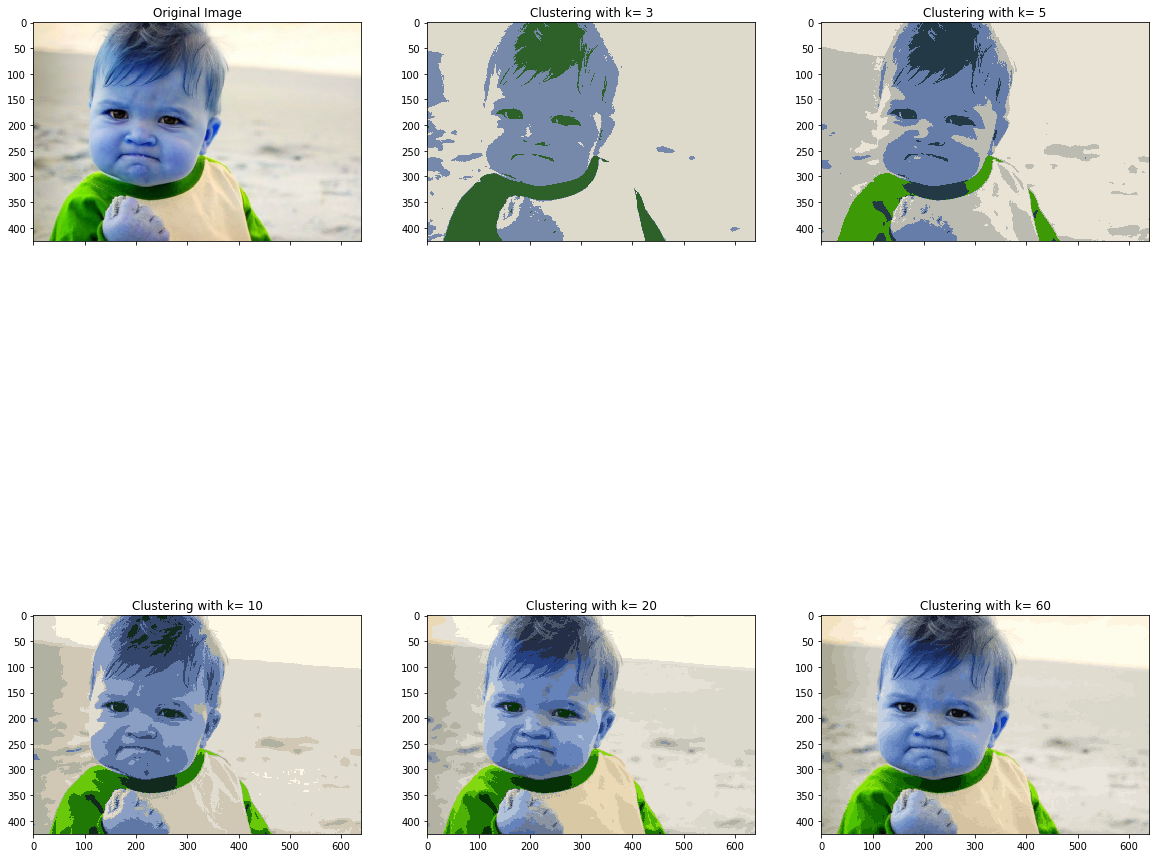

In [3]:
img = cv2.imread('datasets/image.jpg', flags=cv2.IMREAD_COLOR)
kmeans_transform_print(img)

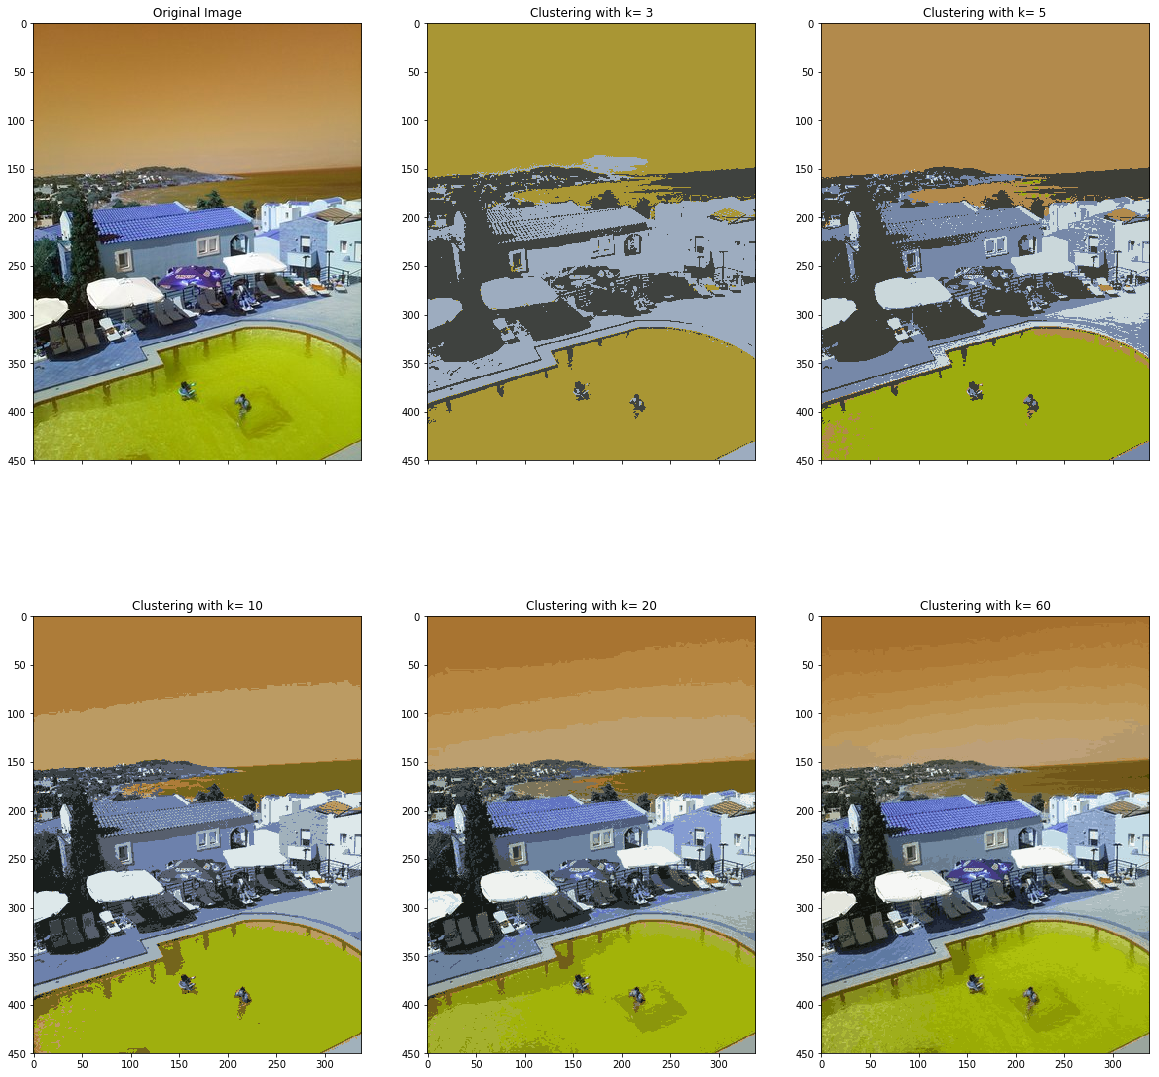

In [4]:
img2 = cv2.imread('datasets/image2.jpg', flags=cv2.IMREAD_COLOR)
kmeans_transform_print(img2)